In [12]:
# 중앙일보에서 해당 키워드로 기사 수집해서 txt 파일로 저장하기
import urllib.request
from bs4 import BeautifulSoup
import time

# 상세 기사 url 수집함수
def ja_detail_url(keyword, num):
    text1 = urllib.parse.quote(keyword)
    params = [ ] # 비어있는 리스트를 생성합니다. 
    
    for i in range(1, num+1):
        list_url = "https://www.joongang.co.kr/search/news?keyword=" + text1 + "&page=" + str(i)
        url = urllib.request.Request(list_url)
        f = urllib.request.urlopen(url).read().decode("utf-8")
    
        soup = BeautifulSoup(f, "html.parser")
        
        for i in soup.select("div.card_body > h2.headline > a"):
            params.append(i.get("href"))

        if len(params) > 5:      # 중앙일보는 옆에 서브 기사까지 같이 스크래핑되므로
            params = params[:-5] # 옆에 관련없는 5개 기사를 제외해주는 코드
            
        time.sleep(1)
    
    return params

# 함수 실행 테스트
# ja_detail_url('에너지', 1)

# 기사 본문 수집 함수
def ja(keyword, num):
    f_ja = open(f"/Users/dgriii0606/ja_{keyword}.txt", "w", encoding="utf8")
    
    result = ja_detail_url(keyword, num)
    
    for i in result:
        url = urllib.request.Request(i)
        f = urllib.request.urlopen(url).read().decode("utf-8")
        
        soup = BeautifulSoup(f, "html.parser")

        # 날짜 가져오기 (datetime 속성 값)
        date_text = ""
        date_element = soup.select_one("time")  # 첫번째 time 태그를 선택합니다. 

        if date_element:
            date_text = date_element['datetime'].strip()  # datetime 속성 값 가져오기
            f_ja.write(date_text + '\n')  # 날짜 저장
            # print(date_text + '\n')

        # 본문 가져오기
        for i in soup.select("#article_body"):
            article_text = i.text.strip() # 본문 기사 양쪽에 있을지 모르는 공백을 잘라냄
            f_ja.write(article_text + '\n') # 본문기사 저장
            # print(article_text)

        f_ja.write("\n" + "=" * 50 + "\n\n") # 기사 구분선(저장용)
        # print("\n" + "=" * 50 + "\n\n") # 기사 구분선(출력용)

    f_ja.close()

# 함수 활용 예시
ja('뉴진스', 20)

In [14]:
# 중앙일보에서 해당 키워드로 기사 수집해서 txt 파일로 저장하기
import urllib.request
from bs4 import BeautifulSoup
import time

# 상세 기사 url 수집함수
def ja_detail_url(keyword, num):
    text1 = urllib.parse.quote(keyword)
    params = [ ] # 비어있는 리스트를 생성합니다. 
    
    for i in range(1, num+1):
        list_url = "https://www.joongang.co.kr/search/news?keyword=" + text1 + "&page=" + str(i)
        url = urllib.request.Request(list_url)
        f = urllib.request.urlopen(url).read().decode("utf-8")
    
        soup = BeautifulSoup(f, "html.parser")
        
        for i in soup.select("div.card_body > h2.headline > a"):
            params.append(i.get("href"))

        if len(params) > 5:      # 중앙일보는 옆에 서브 기사까지 같이 스크래핑되므로
            params = params[:-5] # 옆에 관련없는 5개 기사를 제외해주는 코드
            
        time.sleep(1)
    
    return params

# 함수 실행 테스트
# ja_detail_url('에너지', 1)

# 기사 본문 수집 함수
def ja(keyword, num):
    f_ja = open(f"/Users/dgriii0606/ja_{keyword}.txt", "w", encoding="utf8")
    
    result = ja_detail_url(keyword, num)
    
    for i in result:
        url = urllib.request.Request(i)
        f = urllib.request.urlopen(url).read().decode("utf-8")
        
        soup = BeautifulSoup(f, "html.parser")

        # 날짜 가져오기 (datetime 속성 값)
        date_text = ""
        date_element = soup.select_one("time")  # 첫번째 time 태그를 선택합니다. 

        if date_element:
            date_text = date_element['datetime'].strip()  # datetime 속성 값 가져오기
            f_ja.write(date_text + '\n')  # 날짜 저장
            # print(date_text + '\n')

        # 본문 가져오기
        for i in soup.select("#article_body"):
            article_text = i.text.strip() # 본문 기사 양쪽에 있을지 모르는 공백을 잘라냄
            f_ja.write(article_text + '\n') # 본문기사 저장
            # print(article_text)

        f_ja.write("\n" + "=" * 50 + "\n\n") # 기사 구분선(저장용)
        # print("\n" + "=" * 50 + "\n\n") # 기사 구분선(출력용)

    f_ja.close()

# 함수 활용 예시
ja('에스파', 20)

In [22]:
# 두개의 키워드로 수집한 기사의 두 txt 파일을 하나의 파일로 합치기
file1_path = "/Users/dgriii0606/ja_뉴진스.txt"
file2_path = "/Users/dgriii0606/ja_에스파.txt"

# 합친 파일의 경로 
output_file_path = "/Users/dgriii0606/ja_new_ae.txt"

with open(file1_path, 'r', encoding='utf-8') as file1, \
     open(file2_path, 'r', encoding='utf-8') as file2, \
     open(output_file_path, 'w', encoding='utf-8') as output_file:

    # 첫번째 파일의 내용을 읽어와서 작성
    output_file.write(file1.read())
    output_file.write('\n')  # 파일간의 구분을 위해서 줄바꿈 추가

    # 두번째 파일의 내용을 읽어와서 작성
    output_file.write(file2.read())

print(f'두 파일이 성공적으로 {output_file_path} 에 합쳐졌습니다')

두 파일이 성공적으로 /Users/dgriii0606/ja_new_ae.txt 에 합쳐졌습니다


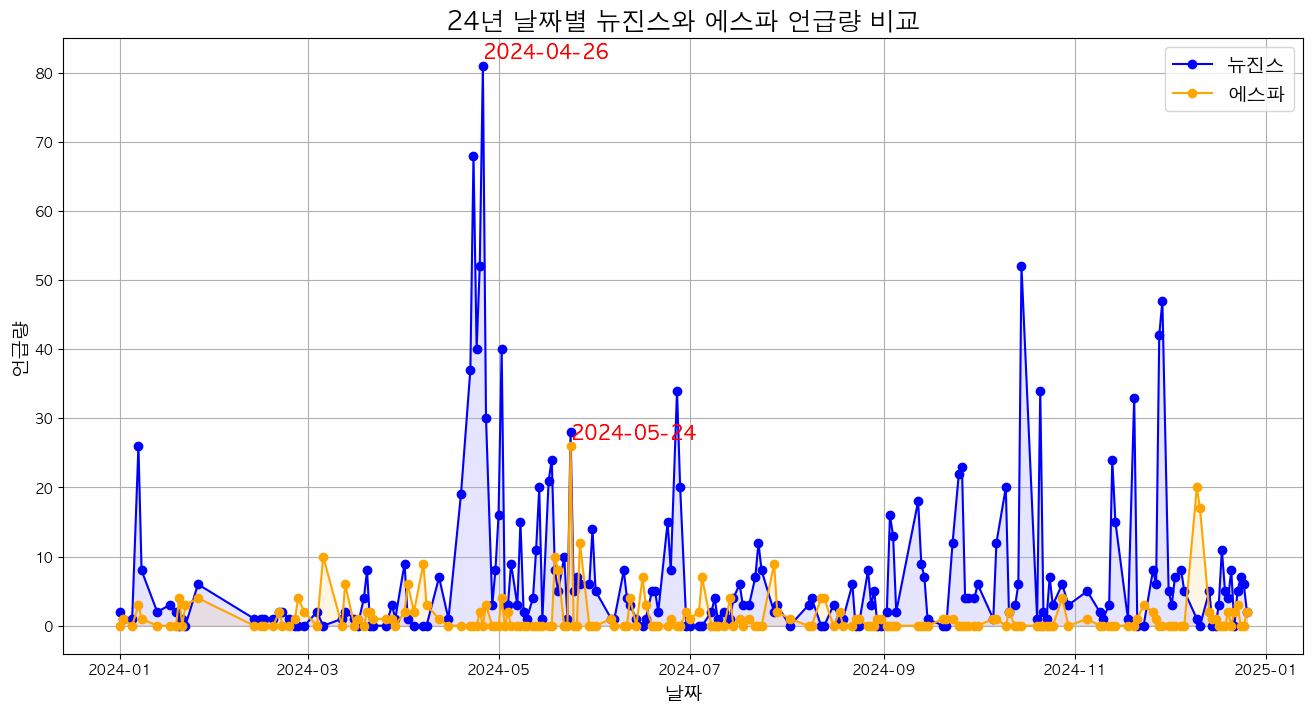

In [30]:
# 수집하여 종합한 텍스트 파일에서 두 키워드의 언급량을 라인그래프로 비교한 함수
def relation_word_comp(location, keyword1, keyword2):

    # 비교 분석 함수 생성
    
    # 모듈 불러오기
    import pandas as pd
    import matplotlib.pyplot as plt
    from collections import Counter
    
    # 비교 분석할 텍스트 파일 열기
    with open(location, "r", encoding = "utf-8") as file:
        text = file.read()
    
    # 텍스트를 엔터 기준으로 분리하기
    lines = text.split('\n')
    # print(lines[:100])
    
    # Counter 모듈 객체화하기
    date_counts1 = Counter()
    date_counts2 = Counter()
    current_date = None
    
    # 2023년 또는 2024년으로 시작하는 라인만 추출 (기사날짜와 제목을 추출)
    for line in lines:
        if line.startswith('2023-') or line.startswith('2024-'):
            current_date = line[:10] # 날짜만 추출
            # print(current_date)
        if current_date:
            if keyword1 in line: # keyword1 라는 단어를 포함한다면
                date_counts1[current_date] += line.count(keyword1)
    
            if keyword2 in line: # keyword2 라는 단어를 포함한다면
                date_counts2[current_date] += line.count(keyword2)
    
    # 판다스 데이터 프레임 생성
    df1 = pd.DataFrame(list(date_counts1.items()), columns = ['date', f'{keyword1} CNT'])
    df2 = pd.DataFrame(list(date_counts2.items()), columns = ['date', f'{keyword2} CNT'])
    
    # 날짜를 datetime 형식으로 변환
    df1['date'] = pd.to_datetime(df1['date'])
    df2['date'] = pd.to_datetime(df2['date'])
    
    # 두 데이터 프레임을 날짜 기준으로 병합하기
    df = pd.merge(df1, df2, on = 'date', how = 'outer').fillna(0)
    
    # 2024년 4월 1일부터 6월 30일 까지 데이터만 필터링
    start_date = pd.Timestamp('2024-01-01')
    end_date = pd.Timestamp('2024-12-31')
    
    # 문법 : df[컬럼선택][검색조건]
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # 시각화 하기
    plt.rcParams['font.family'] = 'AppleGothic' # 한글 안 깨지게 함
    plt.figure(figsize = (16, 8))
    plt.plot(df['date'], df[f'{keyword1} CNT'], marker='o', color='b', label=keyword1)
    plt.plot(df['date'], df[f'{keyword2} CNT'], marker='o', color='orange', label=keyword2)
    plt.fill_between(df['date'], df[f'{keyword1} CNT'], color='blue', alpha=0.1)
    plt.fill_between(df['date'], df[f'{keyword2} CNT'], color='orange', alpha=0.1)
    
    # 첫번째 그래프 피크 값의 날짜를 표시
    for keyword in [keyword1, keyword2]:
        peak_indices = df[df[f'{keyword1} CNT'] == df[f'{keyword1} CNT'].max()].index
        for i in peak_indices:
            plt.text(df['date'][i], df[f'{keyword1} CNT'][i] + 1, df['date'][i].strftime('%Y-%m-%d'),
                     color = 'red', fontsize = 14)
    
    # 두번째 그래프 피크 값의 날짜를 표시
    for keyword in [keyword1, keyword2]:
        peak_indices = df[df[f'{keyword2} CNT'] == df[f'{keyword2} CNT'].max()].index
        for i in peak_indices:
            plt.text(df['date'][i], df[f'{keyword2} CNT'][i] + 1, df['date'][i].strftime('%Y-%m-%d'),
                     color = 'red', fontsize = 14)
    
    plt.title(f'24년 날짜별 {keyword1}와 {keyword2} 언급량 비교', fontsize = 18)
    plt.xlabel('날짜', fontsize = 14)
    plt.ylabel('언급량', fontsize = 14)
    plt.legend(fontsize = 14)
    plt.grid(True)

# 함수 활용 예시
relation_word_comp('/Users/dgriii0606/ja_new_ae.txt', '뉴진스', '에스파')